<a href="https://colab.research.google.com/github/Rigved123-tech/NLP-Basics/blob/main/CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:05<00:00, 228MB/s]
100% 1.06G/1.06G [00:05<00:00, 206MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [7]:
# Generators(divide the dataset into batches of images)
train_ds=keras.utils.image_dataset_from_directory(
    directory=('/content/train'),
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=('/content/test'),
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize pixels

def process(image, label):
  image=tf.cast(image/255. , tf.float32)
  return image, label

train_ds= train_ds.map(process)
validation_ds.map(process)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
# Create CNN model

model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 104ms/step - loss: 1.3653 - accuracy: 0.5749 - val_loss: 1.1020 - val_accuracy: 0.5026
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6402 - accuracy: 0.6411 - val_loss: 6.4151 - val_accuracy: 0.5470
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.6020 - accuracy: 0.6825 - val_loss: 7.7385 - val_accuracy: 0.5762
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5224 - accuracy: 0.7262 - val_loss: 67.5239 - val_accuracy: 0.6394
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4591 - accuracy: 0.7637 - val_loss: 14.8404 - val_accuracy: 0.5922
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4095 - accuracy: 0.7875 - val_loss: 7.9740 - val_accuracy: 0.6120
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3587 - accuracy: 0.8128 - val_loss: 15.9658 - val

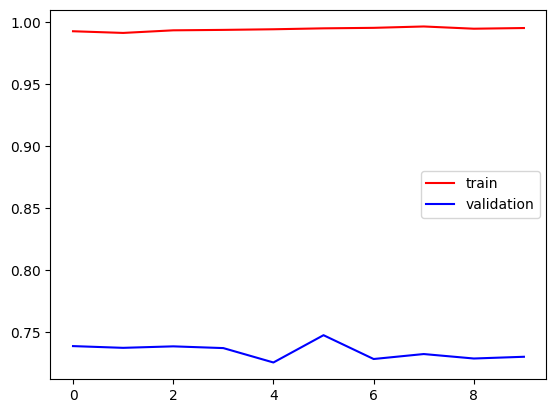

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


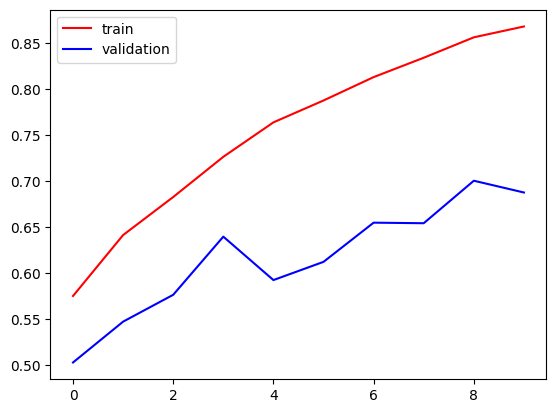

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

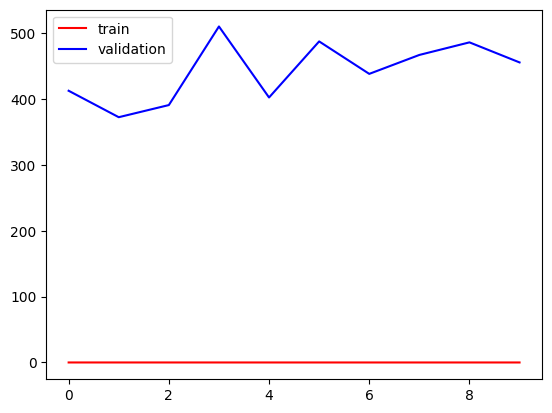

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

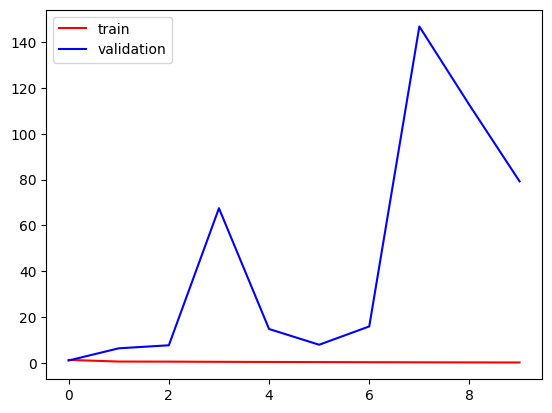

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
import cv2

In [17]:
test_img=cv2.imread('/content/pexels-evg-kowalievska-1170986.jpg')

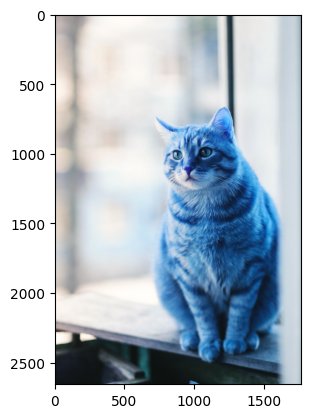

In [18]:
plt.imshow(test_img)

In [19]:
test_img.shape

(2657, 1771, 3)

In [20]:
test_img=cv2.resize(test_img, (256,256))

In [21]:
test_input=test_img.reshape((1, 256, 256, 3))

In [22]:
model.predict(test_input)

1/1 [==============================] - 0s 361ms/step


array([[1.]], dtype=float32)

In [23]:
test_img2=cv2.imread('/content/pexels-goochie-poochie-grooming-3361739.jpg')

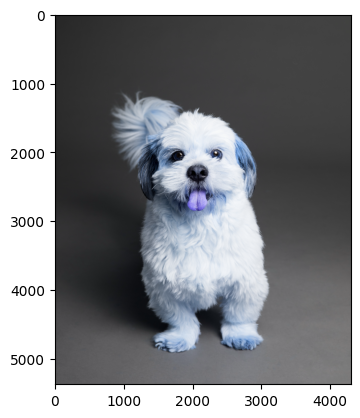

In [24]:
plt.imshow(test_img2)

In [25]:
test_img2.shape

(5371, 4297, 3)

In [27]:
test_img2=cv2.resize(test_img2, (256, 256))

In [28]:
test_input=test_img2.reshape((1, 256, 256, 3))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.48682928]], dtype=float32)